# What the heck am I doing here: an Overview

The first thing a new reader should do is to review the PDF in the attached git repository.

There are three interesting components to this paper. I've included a quote below

"First we show that for a randomly
initialized neural network with sufficiently many
hidden units, the generic gradient descent algo-
rithm learns any low degree polynomial, assum-
ing we initialize the weights randomly. Secondly,
we show that if we use complex-valued weights
(the target function can still be real), then un-
der suitable conditions, there are no “robust lo-
cal minima”: the neural network can always es-
cape a local minimum by performing a random
perturbation. This property does not hold for
real-valued weights. Thirdly, we discuss whether
sparse polynomials can be learned with small
neural networks, with the size dependent on the
sparsity of the target function." - Learning Polynomials with Neural Networks

The goal of the paper was to present some evidence supporting the effectiveness of neural networks, and I wish to further supplement that evidence by investigating some of their claims in this notebook.

## Result 1

We wish to investigate if, "for a randomly initialized neural network with sufficiently many hidden units, the generic gradient descent algorithm learns any low degree polynomial, assuming we initialize the weights randomly."

The most trivial polynomial is the constant zero. However, trying to verify that a neural network can duplicate this result is like trying to use a flamethrower to light a birthday candle.

Recall the universal approximation theorem: 
https://en.wikipedia.org/wiki/Universal_approximation_theorem

If the function we wish to model is constant, I think it follows trivially from this that a neural network is sufficiently powerful. Specifically, setting all the weights and biases to zero, and using any typical, sigmoidal, activation function should do the trick.

Let's use a slightly less trivial example.

f_1(x) = 2x+1



In [1]:
import numpy as np
import matplotlib.pyplot as plot
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import optimizers
from keras import losses
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


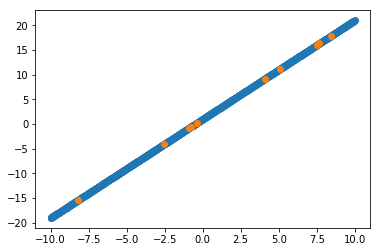

In [2]:
f1 = lambda x: 2*x + 1
xmin = -10
xmax = 10
trainSize = 1000
testSize = 10

def generateSets(f):
    xTrain = np.linspace(xmin,xmax,trainSize)
    yTrain = f(xTrain)
    xTest = np.random.uniform(xmin, xmax, testSize)
    yTest = f(xTest)
    return [[xTrain, yTrain], [xTest, yTest]]

[[x1, y1], [x2, y2]] = generateSets(f1)
plot.scatter(x1,y1)
plot.scatter(x2,y2)
plot.show()

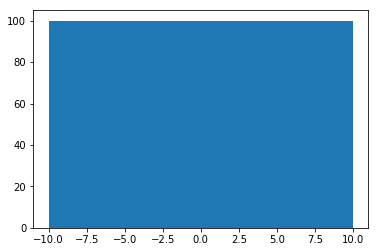

In [3]:
plot.clf()
plot.hist(x1)
plot.show()

In [4]:
plot.clf()
model = Sequential()
model.add(Dense(1,input_shape= (1,), kernel_initializer='random_uniform' ,use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(1,kernel_initializer='random_uniform',use_bias=False))
gradientDescent = optimizers.SGD(lr=0.005)
model.compile(optimizer=optimizers.adagrad(), loss=losses.mean_squared_error)
model.fit(x1,y1)

# plot_model(model)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 134.5819     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 133.1065     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 120.7615     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 82.9456     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 30.3371      ETA: 0s - loss: 31.58
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 4.4599     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 1.1310     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 1.0050     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 1.0019     - ETA: 0s - loss: 1
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 1.0015     


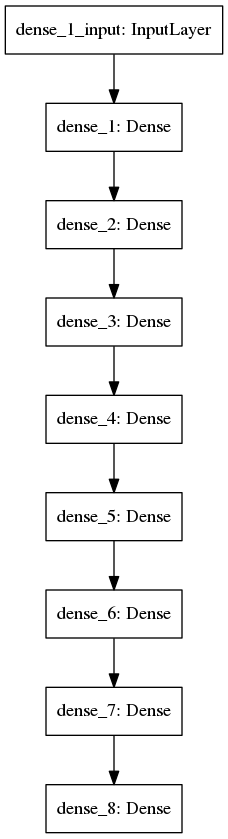

In [13]:
file1 = 'model1.png'
plot_model(model, to_file=file1)
from IPython.display import Image
Image(file1)

In [12]:
score = model.evaluate(x2,y2)
print(score)

10/10 [==============================] - 0s
0.993641376495


# Upshot

It looks like a relativitely straightforward model with a great accuracy. However, the dilemma is this:
1. It's not the model that is described in the paper
2. I'm not convinced that it's using complex numbers in its computation.

